<img width="8%" alt="Naas.png" src="https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/.github/assets/logos/Naas.png" style="border-radius: 15%">

# Tool - Action of the notebook

**Tags:** #tool

**Author:** [Firstname Lastname](https://www.linkedin.com/)

**Last update:** YYYY-MM-DD (Created: YYYY-MM-DD)

**Description:** This notebook demonstrates how to ... -> a one-liner explaining the benefits of the notebooks for the user, as text.

**References:**
- [Naas Documentation](https://site.naas.ai/)

## Input

### Import libraries
Libraries to be used within the notebook.<br>
If these libraries are not installed on Naas, ensure they are installed during the first execution by using a `try`/`except` function to import the package.

In [14]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame

In [15]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

### Setup variables
Variables used in this notebook should be categorized as either mandatory or optional and should be clearly described. The aim of defining these variables in the input section is to facilitate use of the notebook by any user, allowing them to interact with it without the need to modify functions in the model section.


**Mandatory**

- `stock_name`: This variable represents the stock symbol for which you want to fetch data. In this case, 'NFLX' stands for Netflix.


**Optional**

- `date_from`: This variable defines the starting date from which you want to fetch the stock data. It's set to '-3600', which likely represents 3600 days before the current date.
- `date_to`: This variable defines the end date up to which you want to fetch the stock data. When set to 'today', it fetches data up to the current date.
- `moving_averages`: This is a list of integers representing the number of days for which you want to calculate the moving average of the stock price. In this case, moving averages will be calculated for the past 20 and 50 days.
- `csv_output`: This variable represents the name of the CSV file where the fetched data will be saved. In this case, the file will be named 'MY_OUTPUT.csv'.

In [16]:
# get data from text file
df = pd.read_csv("dataset.csv")

#drop ID column
df = df.drop(df.columns[0], axis=1)

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


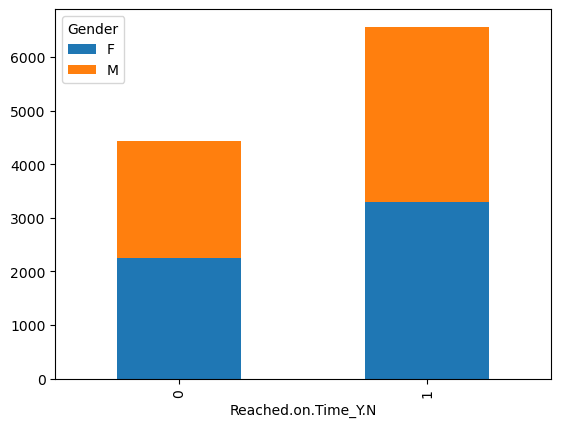

Chi-squared statistic: [0.86654644 0.12814262]
p-value: [0.35191318 0.72036566]


In [17]:
from scipy.stats import chisquare

gender_vs_time = df.groupby(['Gender', 'Reached.on.Time_Y.N']).size().unstack().T


gender_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

#probably drop gender, roughly equal

tab = pd.crosstab(df['Gender'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

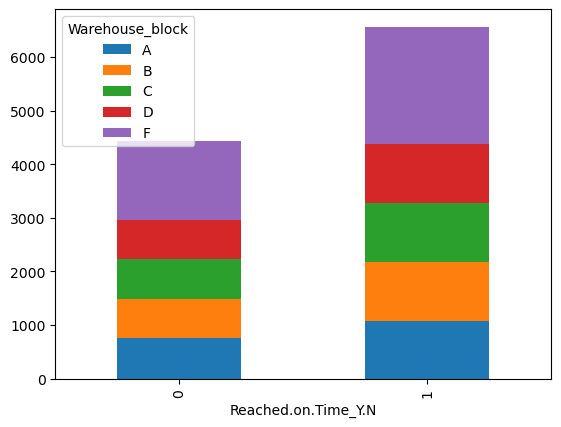

Chi-squared statistic: [482.34310189 740.16090203]
p-value: [4.41214072e-103 7.00761672e-159]


In [18]:
ware_vs_time = df.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).size().unstack().T


ware_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

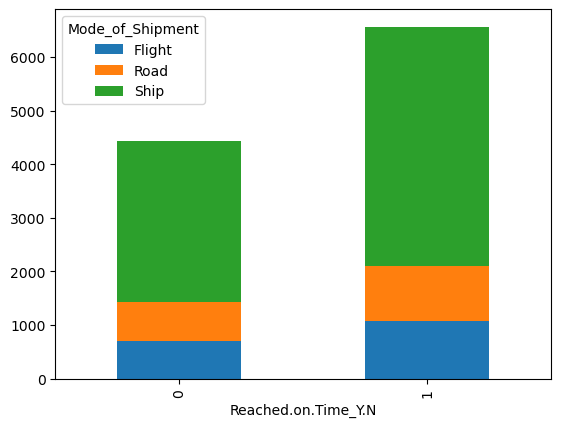

Chi-squared statistic: [2357.21325518 3537.56391894]
p-value: [0. 0.]


In [19]:
mode_vs_time = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack().T


mode_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

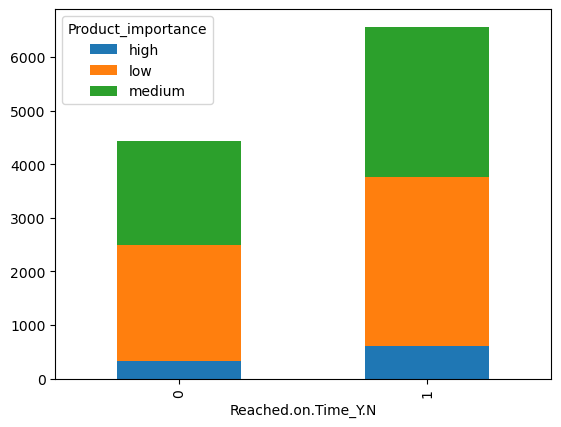

Chi-squared statistic: [1348.72633003 1719.02270303]
p-value: [1.34214252e-293 0.00000000e+000]


In [20]:
importance_vs_time = df.groupby(['Product_importance', 'Reached.on.Time_Y.N']).size().unstack().T
importance_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

## Model

In [21]:
#Dropping Gender, Customer Rating, Customer_care_calls, Prior Purchases

In [22]:
df.drop(['Gender', 'Customer_rating', 'Customer_care_calls', 'Prior_purchases'], axis=1, inplace=True)
print(df.head())

  Warehouse_block Mode_of_Shipment  Cost_of_the_Product Product_importance  \
0               D           Flight                  177                low   
1               F           Flight                  216                low   
2               A           Flight                  183                low   
3               B           Flight                  176             medium   
4               C           Flight                  184             medium   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1  


# Naive Bayes Approach

First, we have to import the necessary libraries for this approach to work

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare the dataset

Separate features (X) from target (Y): 
The target variable is what we are trying to predict, so it should be "Reached on Time". 
It is separated from the input features. X contains all other columns which are the features used to predict the target while
Y contains the target.

In [29]:
X = df.drop('Reached.on.Time_Y.N', axis=1)
y = df['Reached.on.Time_Y.N']

# Displaying to make sure we correctly seperated the target from the rest of the variables.

print("\nFeatures (first 5 rows):")
print(X.head())
print("\nTarget variable sample:")
print(y.head())


Features (first 5 rows):
  Warehouse_block Mode_of_Shipment  Cost_of_the_Product Product_importance  \
0               D           Flight                  177                low   
1               F           Flight                  216                low   
2               A           Flight                  183                low   
3               B           Flight                  176             medium   
4               C           Flight                  184             medium   

   Discount_offered  Weight_in_gms  
0                44           1233  
1                59           3088  
2                48           3374  
3                10           1177  
4                46           2484  

Target variable sample:
0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64


## Encode Categorical Data

When encoding categorical feautures, many ML algorithms, such as Naive Bayes, require the input to be numeric. Because of this, we need a converter. "LabelEncoder" will convert categorical labels into a numerical format. Each unique category in a column is assigned a numerical id. This process is applied to all columns that are of object type (typically strings or categories). This is a crucial step because it turns the data into a suitable format for training ML models.

In [31]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    # initializes a label encoder for each categorical column
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])
    label_encoders[column] = le
    
# example of encoded data to ensure correctness
print("\nEncoded data sample (first 5 rows):")
print(X.head())


Encoded data sample (first 5 rows):
   Warehouse_block  Mode_of_Shipment  Cost_of_the_Product  Product_importance  \
0                3                 0                  177                   1   
1                4                 0                  216                   1   
2                0                 0                  183                   1   
3                1                 0                  176                   2   
4                2                 0                  184                   2   

   Discount_offered  Weight_in_gms  
0                44           1233  
1                59           3088  
2                48           3374  
3                10           1177  
4                46           2484  


## Split the Data into Training and Testing Sets

Splitting data is extremely important on the issue of validating the model. The reason for this step is that it will separate a portion of the data into a testing set. This set will not be seen by the model during training, otherwise this will be known as "data leakage", a real danger in the ML world. This step helps in the evaluation on how well the model performs on unseen data. Setting the test_size = 0.3 just means that 30% of the data is used for testing. The variable random_state ensures that the splits are reproducible (guarantees that you get same split everytime it is run).

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# showcases the sizes of the training and testing datasets
print("\nTraining set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 7699
Testing set size: 3300


## Initialize and Train the Naive Bayes Classifier

CategoricalNB() helps initialize the model. It creates an instance of the Naive Bayes classifier for categorical data.
The other line of code is how we train the model. The "fit method" will train the model using training data (X_train and y_train). The model will learn the probability of each category within the features relative to the target variable (Reached on Time). 

In [39]:
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

## Make Predictions and Evaluate the Model

How can we make predictions? We have to use the predict method. This method is used on the X_test set in order to generate predictions. The predictions are based off of the learned probabilities that we did in the previous step. Now the next course of action is to evaluate the model using accuracy_score. We can use accuracy_score to figure out the "overall correctness" of all these predictions and classification_report. Through this, we can get a pretty detailed view of each of the performace for each class (precision, recall, and F1-score).

We can also plot out the model using a confusion matrix. This will provide a visualization of the accuracy of the predictions that were made.


Accuracy: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.65      0.59      1312
           1       0.73      0.63      0.68      1988

    accuracy                           0.64      3300
   macro avg       0.64      0.64      0.63      3300
weighted avg       0.66      0.64      0.64      3300



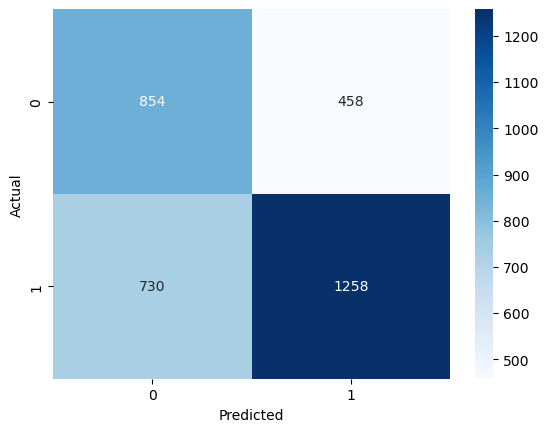

In [43]:
predictions = model.predict(X_test)

# check the accuracy as well as the classification report
print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

# this will plot the confusion matrix
conf_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
# used to plot rectangular data as a color-coded matrix.
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

## Interpreting Results

Let us interpret the results. The accuracy of the proportion for all the predictions is 64%, while the precision is 54% for class 0 and 73% for class 1. The recall is 65% for class 0 and 63% for class 1. The F1-Score looks to be 59% for class 0 and 68% for class 1.

Let us explain the outputs: Having an accuracy of 0.64 indicates that the model correctly predicted 64% of the test data. This does not seem to be the best approach considering even a coin flip has a 0.5 chance of predicting it correctly. 

### Get data from yahoo finance

In [ ]:
df = yahoofinance.get(
    stock_name,
    date_from=date_from,
    date_to=date_to,
    moving_averages=moving_averages
)
df

## Output

### Save DataFrame to csv

In [ ]:
df.to_csv(csv_output, index=False)